Example of how one might look at coadded depth of LSST at high resolution with MAF.
Opsim databases available from:
https://www.lsst.org/scientists/simulations/opsim/opsim-survey-data

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import lsst.sims.maf.db as db
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.maps as maps
import numpy as np
import healpy as hp

In [2]:
# Set up the database connection
# Note, this is a V3 database. All kinds of schema changes will break the rest of the notebook when we go to V4.
opsdb = db.OpsimDatabaseV3('minion_1016_sqlite.db')
outDir = 'dither_plots'
resultsDb = db.ResultsDb(outDir=outDir)

In [3]:
# Note on resolution, crankning up to 2048 made a memory footprint of 12Gb for me. 
# Also takes a looong time to run.
# Scale down to something like 256 or 512 for faster runs.
# Maybe we should look at making it possible to run MAF so values are stored in sparse matrix objects?

nside = 2048
bundleList = []
# select a patch of sky in year 1 in a filter
sql = 'fieldDec>%f and fieldDec<%f and fieldRA>0 and fieldRA<%f and night<365 and filter="r"' % (np.radians(-30), np.radians(-20), np.radians(15))
slicer = slicers.HealpixSlicer(nside=nside,  mjdColName='expMJD', latLonDeg=False, useCache=False, useCamera=True)
# To try it with dithering on:
#slicer = slicers.HealpixSlicer(nside=nside,  mjdColName='expMJD', latLonDeg=False, 
#                               useCache=False, useCamera=True, lonCol='ditheredRA', latCol='ditheredDec')
metric = metrics.Coaddm5Metric()
bundle = metricBundles.MetricBundle(metric,slicer,sql)
bundleList.append(bundle)

# Let's just look at the number of observations too
metric = metrics.CountMetric(col='expMJD')
bundle = metricBundles.MetricBundle(metric,slicer,sql)
bundleList.append(bundle)


bundleDict = metricBundles.makeBundlesDictFromList(bundleList)

Healpix slicer using NSIDE=2048, approximate resolution 1.717743 arcminutes


Querying database Summary with constraint fieldDec>-0.523599 and fieldDec<-0.349066 and fieldRA>0 and fieldRA<0.261799 and night<365 and filter="r" for columns ['fiveSigmaDepth', 'fieldRA', 'rotSkyPos', 'fieldDec', 'expMJD']
Found 198 visits
Running:  ['opsim_CoaddM5_fieldDecgt-0_523599_and_fieldDeclt-0_349066_and_fieldRAgt0_and_fieldRAlt0_261799_and_nightlt365_and_r_HEAL', 'opsim_Count_expMJD_fieldDecgt-0_523599_and_fieldDeclt-0_349066_and_fieldRAgt0_and_fieldRAlt0_261799_and_nightlt365_and_r_HEAL']


Exception ignored in: <bound method SqlRegistry.__del__ of <lsst.daf.persistence.registries.SqliteRegistry object at 0x15f98ed30>>
Traceback (most recent call last):
  File "/Users/yoachim/lsstp3/DarwinX86/daf_persistence/u.danielsf.2.3.7.1.sims-g674f0d60ff/python/lsst/daf/persistence/registries.py", line 320, in __del__
    super(SqlRegistry, self).__del__()
AttributeError: 'super' object has no attribute '__del__'
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/_erfa/core.py:119: ErfaWarning: ERFA function "taiutc" yielded 1 of "dubious year (Note 4)"
  warnings.warn('ERFA function "' + func_name + '" yielded ' + wmsg, ErfaWarning)
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/_erfa/core.py:119: ErfaWarning: ERFA function "taiutc" yielded 1 of "dubious year (Note 4)"
  warnings.warn('ERFA function "' + func_name + '" yielded ' + wmsg, ErfaWarning)
/Users/yoachim/gitRepos/sims_coordUtils/python/l

Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "fieldDec>-0.523599 and fieldDec<-0.349066 and fieldRA>0 and fieldRA<0.261799 and night<365 and filter="r"" constraint now.


/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:60: UserWarning: Optimal bin calculation tried to make 269 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


monopole: 10.9538  dipole: lon: 3.57903, lat: -23.4918, amp: 14.8014


/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:60: UserWarning: Optimal bin calculation tried to make 459 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


monopole: -341.945  dipole: lon: 6.45771, lat: -24.9901, amp: 355.547
Plotting complete.


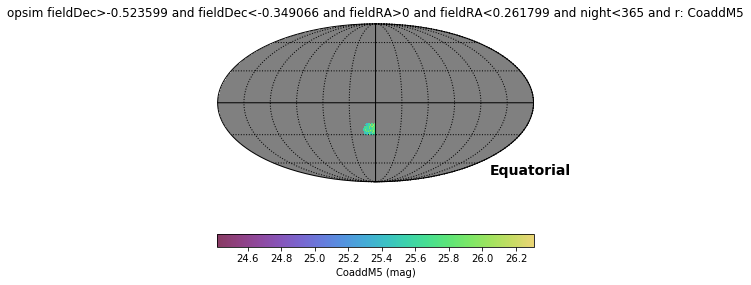

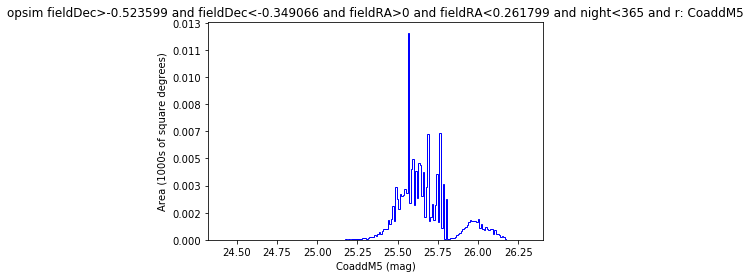

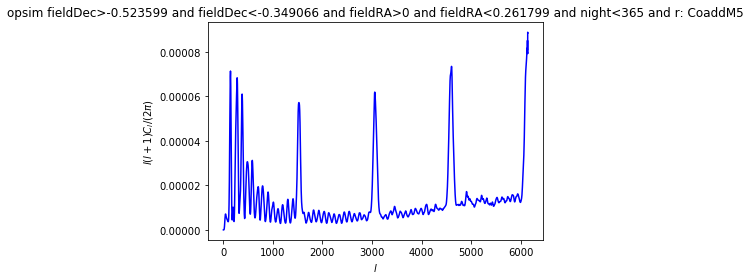

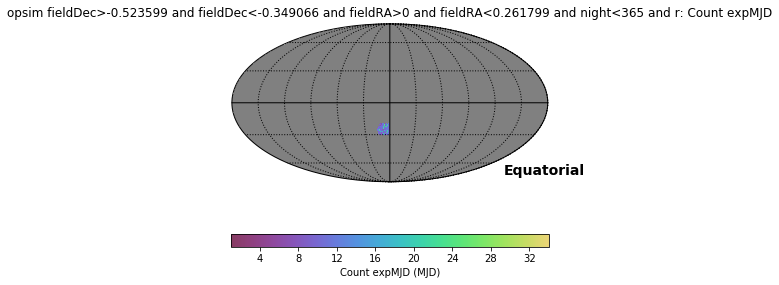

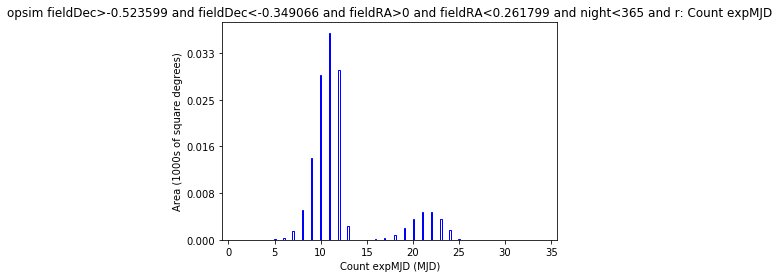

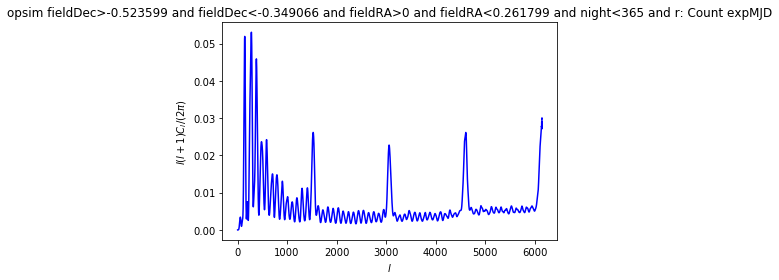

In [4]:
bgroup = metricBundles.MetricBundleGroup(bundleDict, opsdb, outDir=outDir, resultsDb=resultsDb)
bgroup.runAll()
bgroup.plotAll(closefigs=False)

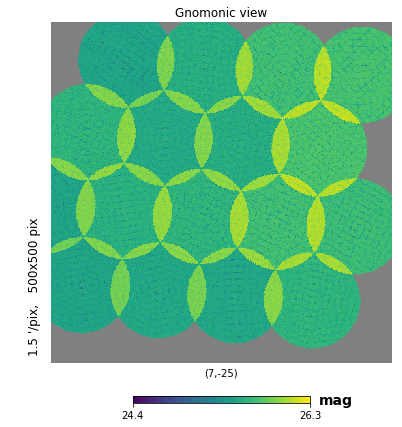

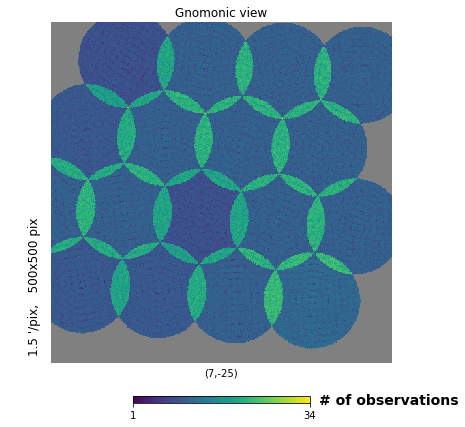

In [9]:
# OK, let's zoom in on the interesting region
hp.gnomview(bundleList[0].metricValues, rot=(7, -25), xsize=500, ysize=500, unit='mag')
hp.gnomview(bundleList[1].metricValues, rot=(7, -25), xsize=500, ysize=500, unit='# of observations')

In [6]:
# So here's the mystery, is this map good? 